# Notebook Setup

In [1]:
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split as tts
sns.set_style("white")

# Dela - Predicting the amount of deaths per year


**Introduction**
<br>
Following the accepted proposal delivered by group-d, group-D delivering an initial first iteration of the provisioning and prediction followed by the evaluation and direction to next Iteration.<br><br>
<b>Project explanation</b><br>
DELA was faced with unprecedented challenge by the unusual fluctuating demands during the Covid19 pandemic first year, and that way DELA is looking to enhance its abilities to react to surprising serge or drops in demands.

To help DELA being prepared for what might come, the developing team will work on providing a yearly death forecast for each municipality in the Netherlands. The yearly death forecast will work as a benchmark that if combined with market share of DELA will provide the demands expected in the future.

The developing team will focus on providing the expected death toll  in the future  per municipality  for the time being as first priority and will investigate the percentage affecting DELA only if the first goal of the project was achieved.
<br><br>
**Project goal**<br>
Providing a forecast for the death toll per municipality for the coming year.<br>

**Document explanation**<br>
In this document group-D will shows the progress of the testing and implementation of the project delivered proposal hypothesis.  
The developing team will use the AI project methodology going through data understanding and experimenting with the collected data. After the understanding, testing the proposal hypothesis if it can be validated by applying machine learning onto our dataset.

### *To Be Noted*. 
For the first iteration delivered document (this document) due to the team choice of first reaching the prediction evaluation in this iteration and the time constraints, **this document overlooks the documentation of data requirement, data understanding, EDA**. The following document will include the full AI methodology chapters. 
<br><br>
<b>Document setup:</b><br>
<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left;">Data requirements</th>
        <td style="text-align: left;">the setup of the requirements for the data that is needed for the prediction. We will answer questions like ‘Which references are trustworthy?’, ‘Do we need some specific features?’, etc…</td>
    </tr>
    <tr>
        <th style="text-align: left;">Data collection</th>
        <td style="text-align: left;">the explaination where we found our data, where to store the data and references to he subchapters of each dataset</td>
    </tr>
    <tr>
        <th style="text-align: left;">Data preparation</th>
        <td style="text-align: left;">In this chapter, we are going to prepare our data so it is clean to work with, think about removing all the data that has invalid records, data that has wrong values or data that has similar features with different names.</td>
    </tr>
</table>

### 2. Provisioning
<b>========== TODO: We need to write an intro here ==========</b> 

### 2.1 Data Requirements
In this chapter, we are trying to setup the expectations/ requirements of the data we are going to collect for the provisioning fase.<br>
<b>========== TODO: Fill in this table ==========</b> 

<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left !important">Data Domain</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Data type</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Target Variable</th>
        <td style="text-align: left !important"></td>
    </tr>
    <tr>
        <th style="text-align: left !important">Expected Features</th>
        <td style="text-align: left !important"></td>
    </tr>
</table>

### 2.2 Data Collection
Because we want to search for data that contains the amount of deaths in the Netherlands, we began searching for an open data bank that is governmental. In this case the data is from a trustworthy source and will higher the chance of a good prediction. That's when we landed on CBS (stands for `Centraal Bureau voor de Statistiek`, translated to English that means  `Central Station of Statistics`). 

<table style="font-size: 14px !important; margin: 0 !important">
    <tr>
        <th style="text-align: left !important">Data Source</th>
        <td style="text-align: left !important">We got our data from the official   <a href="https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS" target="_blank">CBS</a> Website</td>
    </tr>
    <tr>
        <th style="text-align: left !important">Data Storage</th>
        <td style="text-align: left !important">We stored all of our datasets on <a href="https://github.com/i454038/AI-car-price-prediction" target="_blank">Github</a>, so it is globally accessible</td>
    </tr>
</table>

Load in the datasets from Github

In [2]:
def fetchDatasets():
    data = requests.get("https://raw.githubusercontent.com/Dipsaus2002/DELA_Upsacling_Prediction/main/classes/datasets.conf.json").json()
    datasets = []
    for datasetConfig in data:
        datasets.append(datasetConfig)
    return datasets
    
def loadDatasetsIntoDataFrames(datasets):
    dataframes = {}
    # set categories
    for dataset in datasets:
        dataframes[dataset['tag']] = {}
    # load files into categories
    for dataset in datasets:
        data = requests.get(dataset['url']).text
        dataframe = pd.read_csv(StringIO(data), error_bad_lines=False, sep=dataset['seperator'], low_memory=False, skiprows=dataset['skip'])
        dataframes[dataset['tag']][dataset['name']] = dataframe
    return dataframes

datasets = fetchDatasets()
dataframes = loadDatasetsIntoDataFrames(datasets)

In [3]:
# ex = len(dataframes['lifeExpectency']['lifeExpectencyPerRegion']['Gemeente'].unique()
# print(ex, pop)
# sns.pointplot(x="Gemeente", y="Bij geboorte", data=dataframes['lifeExpectency']['lifeExpectencyPerRegion'])

### 2.3 Data Understanding

### 2.4 Data Preperation

To have an overview of what will be done in this chapter, there will be subjects listed below.
- <b>We have multiple datasets that need to be aligned before we can merge them together.</b>
    - It contains renaming, cleaning and formatting features in the right type
- <b>There are also datasets that need to be concatenated because there are to much rows for 1 file.</b>

1. The next chapters consist of each separate dataset with there cleaning/aligning.
2. the chapter after that will actually merge the different datasets.
3. We are going to reduce the dimensionality of the datasets by doing some feature cutting. 

### LifeExpectency
This dataset contains the life expectancy of people in the Netherlands per municipality.   

**To align this dataset with the other datasets, we will perform the following actions:**
1. rename columns to English and making the renaming consistent across the datasets
2. transform the type of columns where needed

In [4]:
dataframes['lifeExpectency']['lifeExpectencyPerRegion'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               355 non-null    int64 
 1   Gemeente                         355 non-null    object
 2   Groep_rij                        355 non-null    object
 3   Geslacht                         355 non-null    object
 4   Bij geboorte                     355 non-null    object
 5   Bij geboorte (afwijking tov NL)  355 non-null    object
 6   Bij 65 jaar                      355 non-null    object
 7   Bij 65 jaar (afwijking tov NL)   355 non-null    object
dtypes: int64(1), object(7)
memory usage: 22.3+ KB


1. After plotting the information, There are columns that are registered as Dtype `Object`, that need to be `float`. For example:
- **'Bij geboorte'** stands for **life expectancy registered at birth** within that municipality. Because the unit of life expectency within this dataset is a number, it should be registered as Dtype `float`  

2. To be consistent in the naming across the datasets, we are going to use the English translation of `Gemeente` witch is `Municipality`.
3. In the following cell, you will see the cleaning of this dataset and the approach we took in this cleaning.

In [5]:
def fetchJsonMap(name, mappingType):
    return requests.get(
        f"https://raw.githubusercontent.com/Dipsaus2002/DELA_Upsacling_Prediction/main/classes/{mappingType}/{name}.{mappingType}.json"
    ).json()
    

dataframes['lifeExpectency']['lifeExpectencyPerRegion'] = (
    dataframes['lifeExpectency']['lifeExpectencyPerRegion']
        .rename(columns=fetchJsonMap('lifeExpectency.lifeExpectencyPerRegion', 'renaming'))
        .assign(LifeExpectancy = lambda x: x.LifeExpectancy.str.replace(',', '.').astype(float))
        .assign(LifeExpectancyWhen65OrOlder = lambda x: x.LifeExpectancyWhen65OrOlder.str.replace(',', '.').astype(float))
)

After modifying the dataset, to confirm that the features are renamed and changed in type, we will print the info from the dataset again.

In [6]:
dataframes['lifeExpectency']['lifeExpectencyPerRegion'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             355 non-null    int64  
 1   Municipality                   355 non-null    object 
 2   Groep_rij                      355 non-null    object 
 3   Geslacht                       355 non-null    object 
 4   LifeExpectancy                 355 non-null    float64
 5   LifeExpectancyNL               355 non-null    object 
 6   LifeExpectancyWhen65OrOlder    355 non-null    float64
 7   LifeExpectancyWhen65OrOlderNL  355 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.3+ KB


As you can see the info of the cleaned dataset again, we can see that the columns are renamed and the Dtypes of the needed features are changed to type `float`.

### PopulationChange
This dataset contains the change in population per municipality. 

**To align this dataset with the other datasets, we will perform the following actions:**
1. rename columns to English and making the renaming consistent across the datasets
2. transform the type of columns where needed

In [7]:
dataframes['populationChange']['pop2002_2020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10488 entries, 0 to 10487
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   10488 non-null  int64  
 1   RegioS                               10488 non-null  object 
 2   Perioden                             10488 non-null  object 
 3   BevolkingAanHetBeginVanDePeriode_1   8056 non-null   float64
 4   LevendGeborenKinderen_2              8055 non-null   float64
 5   Overledenen_3                        8055 non-null   float64
 6   TotaleVestiging_4                    8055 non-null   float64
 7   VestigingVanuitEenAndereGemeente_5   8055 non-null   float64
 8   Immigratie_6                         8055 non-null   float64
 9   TotaalVertrekInclAdmCorrecties_7     8055 non-null   float64
 10  VertrekNaarAndereGemeente_8          8055 non-null   float64
 11  EmigratieInclusiefAdmCorrect

1. After plotting the information, We can conclude that we need to rename some columns again. For example:
    - **RegioS** is the same as **Municipality**, we will rename it to Municipality to make it consistent across the datasets
    - **Perioden** is the same as **Year**, we will rename it to Year to make it consistent across the datasets
2. The printing also shows that **Year** needs to be of type `int` and we need to transform that.
2. In the following cell, you will see the cleaning of this dataset and the approach we took in this cleaning.

In [8]:
# transform dataset to align with others
dataframes['populationChange']['pop2002_2020'] = (
    dataframes['populationChange']['pop2002_2020']
        .rename(columns=fetchJsonMap('populationChange.pop2002_2020', 'renaming'))
        .assign(Year = lambda x: pd.to_datetime(x.Year.str[:4]).dt.year)
)

After modifying the dataset, to confirm that the features are renamed and changed in type, we will print the info from the dataset again.

In [9]:
dataframes['populationChange']['pop2002_2020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10488 entries, 0 to 10487
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    10488 non-null  int64  
 1   Municipality                          10488 non-null  object 
 2   Year                                  10488 non-null  int64  
 3   PopulationAtBeginOfPeriod             8056 non-null   float64
 4   AliveBornChildren                     8055 non-null   float64
 5   Deceased                              8055 non-null   float64
 6   TotalLocations                        8055 non-null   float64
 7   LocationsFromOtherMunicipality        8055 non-null   float64
 8   Immigration                           8055 non-null   float64
 9   TotaalVertrekInclAdmCorrecties_7      8055 non-null   float64
 10  AmountMovedToOtherMunicipality        8055 non-null   float64
 11  EmigratieInclus

As you can see the info of the cleaned dataset again, we can see that the columns are renamed and the Dtypes of the needed features are changed to type `int`. Unfortunately, that is not everything to make this dataset align to the other datasets. We will show that by printing out the data inside the dataset.

In [10]:
dataframes['populationChange']['pop2002_2020'].head()

ID Municipality  Year  PopulationAtBeginOfPeriod  AliveBornChildren  \
0  14604       GM1680  2002                    25552.0              289.0   
1  14617       GM1680  2003                    25305.0              279.0   
2  14630       GM1680  2004                    25218.0              233.0   
3  14643       GM1680  2005                    25329.0              230.0   
4  14656       GM1680  2006                    25507.0              216.0   

   Deceased  TotalLocations  LocationsFromOtherMunicipality  Immigration  \
0     251.0          1353.0                          1121.0        232.0   
1     241.0          1127.0                          1071.0         56.0   
2     221.0          1167.0                          1104.0         63.0   
3     231.0          1322.0                          1254.0         68.0   
4     212.0          1369.0                          1320.0         49.0   

   TotaalVertrekInclAdmCorrecties_7  AmountMovedToOtherMunicipality  \
0                            1617.0                          1498.0   
1                            1264.0                          1111.0   
2                            1077.0                          1023.0   
3                            1143.0                          1062.0   
4                            1326.0                          1222.0   

   EmigratieInclusiefAdmCorrecties_9  OverigeCorrecties_10  PopulationGrowth  \
0                              119.0                 -21.0            -247.0   
1                              153.0                  12.0             -87.0   
2                               54.0                   9.0             111.0   
3                               81.0                   0.0             178.0   
4                              104.0                   9.0              56.0   

   RelativePopulationGrowth  PopulationGrowthSinceJanuari  \
0                     -0.97                        -247.0   
1                     -0.34                         -87.0   
2                      0.44                         111.0   
3                      0.70                         178.0   
4                      0.22                          56.0   

   RelativePopulationGrowthSinceJanuari  PopulationAtEndOfPeriod  
0                                 -0.97                  25305.0  
1                                 -0.34                  25218.0  
2                                  0.44                  25329.0  
3                                  0.70                  25507.0  
4                                  0.22                  25563.0

In this data frame you can see that the municipalities are coded instead of containing the actual name of the municipality. To align it with the other datasets, we map those features to the names of the municipality. You can see the code below.

In [11]:
dataframes['populationChange']['pop2002_2020'] = (
    dataframes['populationChange']['pop2002_2020']
        .assign(Municipality = lambda x: x.Municipality.replace(fetchJsonMap('Municipality', 'mapping')))
)
dataframes['populationChange']['pop2002_2020'].head()

ID Municipality  Year  PopulationAtBeginOfPeriod  AliveBornChildren  \
0  14604  Aa en Hunze  2002                    25552.0              289.0   
1  14617  Aa en Hunze  2003                    25305.0              279.0   
2  14630  Aa en Hunze  2004                    25218.0              233.0   
3  14643  Aa en Hunze  2005                    25329.0              230.0   
4  14656  Aa en Hunze  2006                    25507.0              216.0   

   Deceased  TotalLocations  LocationsFromOtherMunicipality  Immigration  \
0     251.0          1353.0                          1121.0        232.0   
1     241.0          1127.0                          1071.0         56.0   
2     221.0          1167.0                          1104.0         63.0   
3     231.0          1322.0                          1254.0         68.0   
4     212.0          1369.0                          1320.0         49.0   

   TotaalVertrekInclAdmCorrecties_7  AmountMovedToOtherMunicipality  \
0                            1617.0                          1498.0   
1                            1264.0                          1111.0   
2                            1077.0                          1023.0   
3                            1143.0                          1062.0   
4                            1326.0                          1222.0   

   EmigratieInclusiefAdmCorrecties_9  OverigeCorrecties_10  PopulationGrowth  \
0                              119.0                 -21.0            -247.0   
1                              153.0                  12.0             -87.0   
2                               54.0                   9.0             111.0   
3                               81.0                   0.0             178.0   
4                              104.0                   9.0              56.0   

   RelativePopulationGrowth  PopulationGrowthSinceJanuari  \
0                     -0.97                        -247.0   
1                     -0.34                         -87.0   
2                      0.44                         111.0   
3                      0.70                         178.0   
4                      0.22                          56.0   

   RelativePopulationGrowthSinceJanuari  PopulationAtEndOfPeriod  
0                                 -0.97                  25305.0  
1                                 -0.34                  25218.0  
2                                  0.44                  25329.0  
3                                  0.70                  25507.0  
4                                  0.22                  25563.0

As you can see in the data frame above, the municipalities are mapped to their names and the data is correct enough to go further.

### Deaths

We do not merge this dataset yet, because it only has 20 municipalities and it will not have enough data for our need

In [12]:
dataframes['death']['reason_per_year_per_region2002_2020'] = (
    pd.concat([
        dataframes['death']['reasons_per_year_per_region2002_2015'], 
        dataframes['death']['reasons_per_year_per_region2016_2020']
    ])
)

dataframes['death']['reason_per_year_per_region2002_2020'] = (
    dataframes['death']['reason_per_year_per_region2002_2020']
        .rename(columns={'RegioS': 'Municipality', 'Perioden': 'Year'})
        .assign(Year = lambda x: pd.to_datetime(x.Year.str[:4]).dt.year)
)

### Merge Datasets

<table style="margin: 0 !important; font-size: 14px !important">
    <tr>
        <th style="text-align: left !important">Goal:</th>
        <td style="text-align: left !important">
            Merge the datasets:<br>
            <ul>
                <li>lifeExpectency</li>
                <li>population</li>
                <li>reason of death</li>
            </ul>
        </td>
    </tr>
    <tr>
        <th style="text-align: left !important">Possible Solutions:</th>
        <td style="text-align: left !important">
            <ul>
                <li>merge (pandas)</li>
                <li>concatinate (pandas)</li>
            </ul>
        </td>
    </tr>
</table>

**Merge**<br>
Merge data frames based with a database-style join. The join is done on a column<br>
**Concatinate**<br>
Concatenate concatenates objects along a particular axis(x or y). It is mainly used for datasets with exactly the same columns.<br>
**What is the best solution?**<br>
Our datasets do not have the same columns, it's even so that they have diffrent columns. We want to add features to one dataset and we do not want to align the dataset on a particular axis. This is why we are using the merge function to make one big dataset.

In [13]:
dataset = (
    dataframes['populationChange']['pop2002_2020']
        .merge(dataframes['lifeExpectency']['lifeExpectencyPerRegion'], how='outer', on="Municipality")
#         .merge(dataframes['death']['reason_per_year_per_region2002_2020'], how='outer', on=['Year', "Municipality"])
        .assign(Municipality = lambda x: x.Municipality.replace(fetchJsonMap('Municipality', 'mapping')))
        .fillna(0)
        .assign(Year = lambda x: x.Year.replace(0, 2002))
        .assign(Year = lambda x: x.Year.astype(int))
)

We have come from different datasets and now made 1 of it. To make it work for further preparation/machine learning, I chose to fill all the `na` values with `0`, but there is no valuable reason yet. We should investigate what to do in the following iteration.<br>
We also replaced the empty years with `2002`, that's because we needed a year and it other wise took year 0, witch would skew the data. There is some data understanding needed to make this better.<br><br>
We also some municipalities that have no data. therefor, we searched for differences between the datasets in municipalities, and we only select the municipalities that are existent in both datasets. Out of precaution, we removed the rows with those municipalities to not have high r2 scores with bad data. 

In [14]:
diffrence = [
    item for item in 
    dataframes['populationChange']['pop2002_2020']['Municipality'].unique() 
    if item not in 
    dataframes['lifeExpectency']['lifeExpectencyPerRegion']['Municipality'].unique()
]
dataset = dataset.query("Municipality not in @diffrence")

After removing the differences in municipalities, there is also a need to remove non-important features. First of all because those are not important, but the second reason is removing unnecessary features that contain string values that are in the way of making a heatmap.  

In [15]:
dataset = dataset[[
    i for i in list(dataset.columns) 
    if i not in 
    ['ID', 'id', 'Groep_rij', 'Geslacht', 'LifeExpectancyNL', 'LifeExpectancyWhen65OrOlderNL', 'Geslacht_y']
]]

In [16]:
dataset.head()

Municipality  Year  PopulationAtBeginOfPeriod  AliveBornChildren  Deceased  \
0  Aa en Hunze  2002                    25552.0              289.0     251.0   
1  Aa en Hunze  2003                    25305.0              279.0     241.0   
2  Aa en Hunze  2004                    25218.0              233.0     221.0   
3  Aa en Hunze  2005                    25329.0              230.0     231.0   
4  Aa en Hunze  2006                    25507.0              216.0     212.0   

   TotalLocations  LocationsFromOtherMunicipality  Immigration  \
0          1353.0                          1121.0        232.0   
1          1127.0                          1071.0         56.0   
2          1167.0                          1104.0         63.0   
3          1322.0                          1254.0         68.0   
4          1369.0                          1320.0         49.0   

   TotaalVertrekInclAdmCorrecties_7  AmountMovedToOtherMunicipality  \
0                            1617.0                          1498.0   
1                            1264.0                          1111.0   
2                            1077.0                          1023.0   
3                            1143.0                          1062.0   
4                            1326.0                          1222.0   

   EmigratieInclusiefAdmCorrecties_9  OverigeCorrecties_10  PopulationGrowth  \
0                              119.0                 -21.0            -247.0   
1                              153.0                  12.0             -87.0   
2                               54.0                   9.0             111.0   
3                               81.0                   0.0             178.0   
4                              104.0                   9.0              56.0   

   RelativePopulationGrowth  PopulationGrowthSinceJanuari  \
0                     -0.97                        -247.0   
1                     -0.34                         -87.0   
2                      0.44                         111.0   
3                      0.70                         178.0   
4                      0.22                          56.0   

   RelativePopulationGrowthSinceJanuari  PopulationAtEndOfPeriod  \
0                                 -0.97                  25305.0   
1                                 -0.34                  25218.0   
2                                  0.44                  25329.0   
3                                  0.70                  25507.0   
4                                  0.22                  25563.0   

   LifeExpectancy  LifeExpectancyWhen65OrOlder  
0            82.1                         20.4  
1            82.1                         20.4  
2            82.1                         20.4  
3            82.1                         20.4  
4            82.1                         20.4

### Machine Learning

In order to make a proper prediction, we need to split the dataset per municipality. We first did not do it, but we can not feed the model data from another municipality to predict a municipality. That will give a false prediction score so therefor we will split the datasets. **But first** we need to order the dataset differently.

In [17]:
dataset.set_index(['Municipality', 'Year'], inplace=True)

In [18]:
municipalities = dataset.reset_index()['Municipality'].unique()
datasets = {}
for munucipality in municipalities:
    if(dataset.loc[munucipality].shape[0] <= 20 and dataset.loc[munucipality].shape[0] > 1):
        datasets[munucipality] = dataset.loc[munucipality]

In [19]:
len(datasets.keys())

346

As you can see in the code above, we did split the datasets per municipality, so we can at the end predict per municipality.<br>
To check the quality of the datasets, we will check multicollinearity to optimize the prediction. We are using `Amsterdam` as sample to see the correlations. 

<AxesSubplot:>

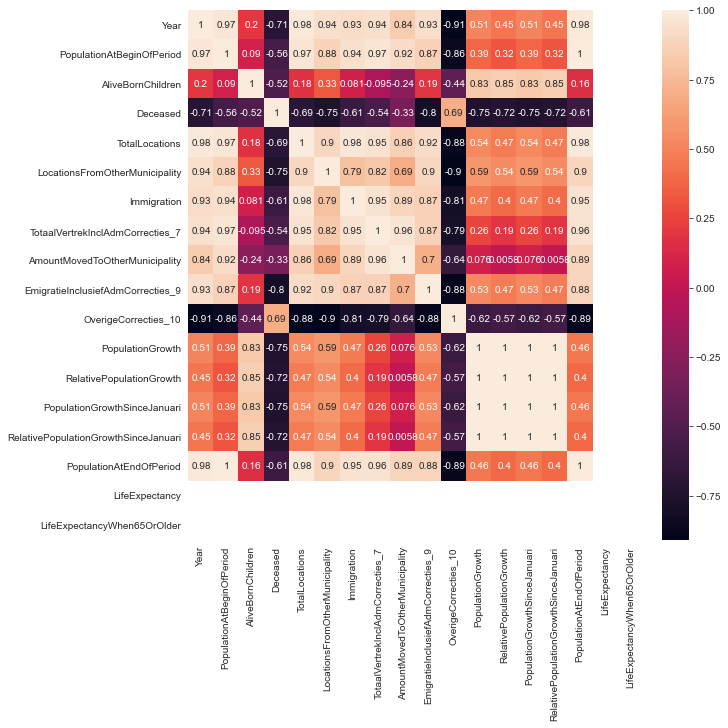

In [20]:
figure = plt.figure(constrained_layout=True, figsize=(10,10))
ax = figure.add_subplot()
sns.heatmap(datasets['Amsterdam'].reset_index().corr(), annot=True, ax=ax)  

As you can see in the correlation map above, you can see some multi correlation going on in this map. There are a lot of features that are almost the same measurement. For example: <br>
- we have 4 features that have information about population growth.
- we have 6 features that have information about immigration.
We will remove most of them and leave one per category. You will see the code of that below.

In [21]:
dataset = dataset[[
    i for i in list(dataset.columns) 
    if i not in 
    [
        'TotalLocations', 'LocationsFromOtherMunicipality', 'TotaalVertrekInclAdmCorrecties_7', 'AmountMovedToOtherMunicipality', 'EmigratieInclusiefAdmCorrecties_9',
        'RelativePopulationGrowth', 'PopulationGrowthSinceJanuari', 'PopulationAtEndOfPeriod', 'RelativePopulationGrowthSinceJanuari'
    ]
]]

After making the dataset correct enough, we are going to do feature selection per municipality, thats why you are seeing the code below as a function. We are doing feature selection with SelectKBest, but it needs some adjustment because we do not have proof that k=4 is the best. We need some revision here.

In [22]:
def doFeatureSelection(dataset):
    
    X = dataset.loc[:, dataset.columns != 'Deceased']
    y = dataset['Deceased']
    sel = SelectKBest(mutual_info_regression, k=4)
    sel.fit_transform(X,y)
    cols = sel.get_support()
    features_df_new = X.iloc[:,cols].keys()
    return features_df_new

For the prediction, we are using nearest neighbors algorithm to make a first indicator for our hypothesis. This also needs some revision because we do not have a good reason yet to use 5 for the amount of neighbors. We still need to change it, But it will give the r2 score for that municipality dataset.<br>
We also forgot to scale that data, witch is a **massive fail**, but next iteration, it will get included.

In [23]:
dataset.loc[:, dataset.columns != 'Deceased'].columns

Index(['PopulationAtBeginOfPeriod', 'AliveBornChildren', 'Immigration',
       'OverigeCorrecties_10', 'PopulationGrowth', 'LifeExpectancy',
       'LifeExpectancyWhen65OrOlder'],
      dtype='object')

In [24]:
scaler = StandardScaler()
def predictByNearestNeighbors(dataset):
    
#     scaler.fit(dataset.loc[:, dataset.columns != 'Deceased'])
#     scaled_features = scaler.transform(dataset.loc[:, dataset.columns != 'Deceased'])
#     X = pd.DataFrame(scaled_features,columns = dataset.loc[:, dataset.columns != 'Deceased'].columns)
    
    scaler.fit(dataset.loc[:, dataset.columns != 'Deceased'])
    scaled_features = scaler.transform(dataset.loc[:, dataset.columns != 'Deceased'])
    X = pd.DataFrame(scaled_features,columns = dataset.loc[:, dataset.columns != 'Deceased'].columns)
    
    
    #X = pd.DataFrame(dataset.index, columns={"Year"})
    y = dataset['Deceased']
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=20, shuffle=True)
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(5, weights='distance')
    prediction = knn.fit(X_train, y_train).predict(X_test)
    
    r2Score = knn.score(X_test, y_test)
    
    return X_train, y_train, X_test, y_test, prediction, r2Score

We made a lot of functions to do feature selection and predicting. Here we are actually looping through all the municipalities to actually do the feature selection and prediction for each municipality. We will make a dictionary with all the data per municipality (with score) to plot it later.

In [25]:
metricsDictionary = {"X_train": {}, "y_train": {}, "X_test": {}, "y_test": {}, "prediction": {},"Score": {}}
for municipality in datasets.keys():
    dataset = datasets[municipality].reset_index()
    features = doFeatureSelection(dataset)
    dataset = dataset[features]
    X_train, y_train, X_test, y_test, prediction, r2Score = predictByNearestNeighbors(datasets[municipality])
    metricsDictionary["X_train"][municipality] = X_train
    metricsDictionary["y_train"][municipality] = y_train
    metricsDictionary["X_test"][municipality] = X_test
    metricsDictionary["y_test"][municipality] = y_test
    metricsDictionary["prediction"][municipality] = prediction
    metricsDictionary["Score"][municipality] = r2Score

scores = pd.DataFrame.from_dict(metricsDictionary).reset_index()
scores = scores.rename(columns={"index": "Municipality"})

After having the r2 scores for all municipalities, to make everything clear, we are plotting the prediction for each municipality. In this case the prediction will be understandable and clear.

In [26]:
def plotNearestNeighbors(municipality, X_train, y_train, X_test, y_test, prediction, r2Score):
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.scatter(X_train, y_train, color="navy", label="train data", s=70)
    plt.scatter(X_test, y_test, color="green", label="test data", s=70)
    plt.scatter(X_test, prediction, color="orange", label="predicted data points", s=70)
    plt.legend(fontsize=14)
    plt.title(f"Amount of Deceased in {municipality} per year. Score: {r2Score}", fontsize=16)

**Machine learning Evaluation**

We are plotting an interactive overview of the scores per municipalities below, so we can zoom in/look at all the municipalities.

In [27]:
fig = px.scatter(scores, x='Municipality', y='Score', color='Municipality')
fig.show()

As you can see in the plot above, there are some serious outliers and scores. Having a score of -40 is not acceptable.<br>
In the plot below you can see that around 82% of the municipalities are within the R2 range -1/1 and the nearly 18 percent are heading the revert axis with scores lower than -1.

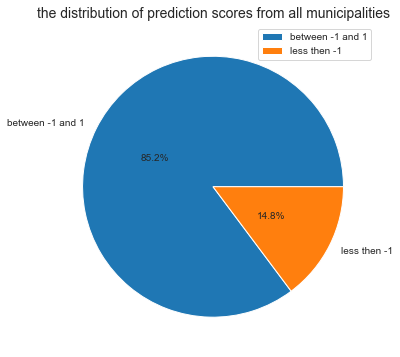

In [28]:
scoresPie = [
     {"type": "between -1 and 1","amount": len(scores.query('Score > -1 or Score < 1'))},
     {"type": "less then -1","amount": len(scores.query('Score < -1'))}
]
scoresPie = pd.DataFrame(scoresPie)
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=scoresPie['amount'], autopct="%.1f%%", labels=scoresPie['type'], pctdistance=0.5)
plt.title("the distribution of prediction scores from all municipalities", fontsize=14);
plt.legend()

It is really needed to make more iterations, because having scores that are less then -1 are not acceptable. We will go further in the second iteration and we will update you further.

The following plots shows the cases how the prediction can be way too far from reality in some municipalities, while it can quite close and helpful in others. We visualized 2 bad scores and 2 ok/good scores in a plot. These plots visualize the actual prediction for those municipalities.

ValueError: x and y must be the same size

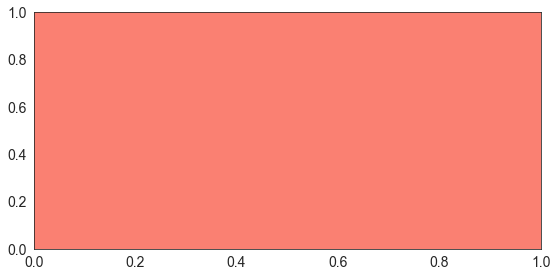

In [29]:
badPredictions = scores.query('Score < -1').reset_index().loc[0:1].assign(Bg = lambda x: 'salmon')
goodPredictions = scores.query('Score > -1').reset_index().iloc[0:2].assign(Bg = lambda x: 'mediumaquamarine')
predictions = pd.concat([badPredictions, goodPredictions])
plotcount = 1
plt.figure(figsize=(20, 20))
for i, prediction in predictions.iterrows():
    ax = plt.subplot(4,2, plotcount)
    ax.set_facecolor(prediction['Bg'])
    plotNearestNeighbors(prediction['Municipality'], prediction["X_train"], prediction["y_train"], prediction["X_test"], prediction["y_test"],prediction["prediction"], prediction["Score"])
    plotcount +=1

## Evaluation of the first document and direction for the coming iteration:

1.	Our data includes 20 years for each municipality, which is 20 observation per municipality in total.For that Group-D contacted CBS for the historical record before 2002 and starting Monday13/12/2021 continuing the communication with CBS about the data.
2.	In case the data was not provided by the CBS, the data will be switched from yearly to monthly to increase the number of observations per municipalities and **the prediction will be switched from yearly to monthly**
3.	Evaluation of the suspicious municipalities data.
4.	Understand and iterate the NearestNeighbor better and evaluate.
5.	Consult with ML specialist and continue to TimeSeries. 



In [30]:
dataframes['populationChange']['perMonth']=(
pd.concat([
    dataframes['populationChange']['perMonth1'],
    dataframes['populationChange']['perMonth2'],
    dataframes['populationChange']['perMonth3'],
    dataframes['populationChange']['perMonth4'],
    dataframes['populationChange']['perMonth5'],
    dataframes['populationChange']['perMonth6'],
    dataframes['populationChange']['perMonth7'],
    dataframes['populationChange']['perMonth8'],
    dataframes['populationChange']['perMonth9'],
    dataframes['populationChange']['perMonth10'],
    dataframes['populationChange']['perMonth11'],
    dataframes['populationChange']['perMonth12'],
    dataframes['populationChange']['perMonth13'],
    dataframes['populationChange']['perMonth14'],
    dataframes['populationChange']['perMonth15']
])
)


In [31]:
# transform dataset to align with others
dataframes['populationChange']['perMonth'] = (
    dataframes['populationChange']['perMonth']
        .rename(columns=fetchJsonMap('populationChange.pop2002_2020', 'renaming'))
        .assign(Municipality = lambda x: x.Municipality.replace(fetchJsonMap('Municipality', 'mapping')))
        #.assign(Year = lambda x: pd.to_datetime(x.Year.str[:4]).dt.year)
)

In [32]:
dataframes['populationChange']['perMonth'] = (
    dataframes['populationChange']['perMonth']
        .assign(Municipality = lambda x: x.Municipality.replace(fetchJsonMap('Municipality', 'mapping')))
)

perMonth=dataframes['populationChange']['perMonth']

In [33]:
perMonth.Year = perMonth.Year.str.replace("MM", '/')
perMonth.Year = pd.to_datetime(perMonth.Year)


In [34]:
perMonth.dropna(axis=0, inplace=True)
perMonth.shape

(1502730, 10)

In [35]:
# municipalities = dataset.reset_index()['Municipality'].unique()
# datasets = {}
# for munucipality in municipalities:
#     if(dataset.loc[munucipality].shape[0] <= 20 and dataset.loc[munucipality].shape[0] > 1):
#         datasets[munucipality] = dataset.loc[munucipality]

In [36]:
perMonth.set_index(['Municipality', 'Year'], inplace=True)

In [37]:
municipalities = perMonth.reset_index()['Municipality'].unique()
ff = {}
for munucipality in municipalities:
    if(perMonth.loc[munucipality].shape[0] > 200):
        ff[munucipality] = perMonth.loc[munucipality]

In [38]:
len(ff.keys())

537

In [39]:
#aaEnHunze=datasets['Aa en Hunze']['Deceased']
aaEnHunze=ff['Aa en Hunze']['Deceased']

In [40]:
datasets['Aa en Hunze']

PopulationAtBeginOfPeriod  AliveBornChildren  Deceased  TotalLocations  \
Year                                                                           
2002                    25552.0              289.0     251.0          1353.0   
2003                    25305.0              279.0     241.0          1127.0   
2004                    25218.0              233.0     221.0          1167.0   
2005                    25329.0              230.0     231.0          1322.0   
2006                    25507.0              216.0     212.0          1369.0   
2007                    25563.0              237.0     235.0          1208.0   
2008                    25598.0              223.0     219.0          1163.0   
2009                    25675.0              205.0     240.0          1074.0   
2010                    25563.0              195.0     236.0          1306.0   
2011                    25785.0              173.0     254.0          1092.0   
2012                    25738.0              170.0     260.0          1084.0   
2013                    25541.0              164.0     235.0          1051.0   
2014                    25357.0              159.0     240.0          1103.0   
2015                    25203.0              167.0     250.0          1377.0   
2016                    25243.0              136.0     274.0          1457.0   
2017                    25286.0              164.0     265.0          1682.0   
2018                    25390.0              162.0     283.0          1501.0   
2019                    25386.0              176.0     280.0          1512.0   
2020                    25445.0              167.0     274.0          1520.0   

      LocationsFromOtherMunicipality  Immigration  \
Year                                                
2002                          1121.0        232.0   
2003                          1071.0         56.0   
2004                          1104.0         63.0   
2005                          1254.0         68.0   
2006                          1320.0         49.0   
2007                          1151.0         57.0   
2008                          1087.0         76.0   
2009                           984.0         90.0   
2010                          1095.0        211.0   
2011                          1017.0         75.0   
2012                           995.0         89.0   
2013                           980.0         71.0   
2014                          1050.0         53.0   
2015                          1308.0         69.0   
2016                          1374.0         83.0   
2017                          1592.0         90.0   
2018                          1414.0         87.0   
2019                          1411.0        101.0   
2020                          1465.0         55.0   

      TotaalVertrekInclAdmCorrecties_7  AmountMovedToOtherMunicipality  \
Year                                                                     
2002                            1617.0                          1498.0   
2003                            1264.0                          1111.0   
2004                            1077.0                          1023.0   
2005                            1143.0                          1062.0   
2006                            1326.0                          1222.0   
2007                            1192.0                          1099.0   
2008                            1121.0                          1096.0   
2009                            1131.0                          1055.0   
2010                            1051.0                           990.0   
2011                            1061.0                           997.0   
2012                            1192.0                          1018.0   
2013                            1165.0                          1090.0   
2014                            1177.0                          1088.0   
2015                            1249.0                          1183.0   
2016                       

In [41]:
type(aaEnHunze)

pandas.core.series.Series

In [42]:
import itertools
import statsmodels
import statsmodels.api as sm
import matplotlib
import warnings



In [43]:
aaEnHunze = aaEnHunze.to_frame()
aaEnHunze["Deceased"] = aaEnHunze["Deceased"].astype(int)
y= aaEnHunze

In [44]:
y.head()

Deceased
Year                
2002-01-01        21
2002-02-01        16
2002-03-01        23
2002-04-01        13
2002-05-01        20

In [45]:


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


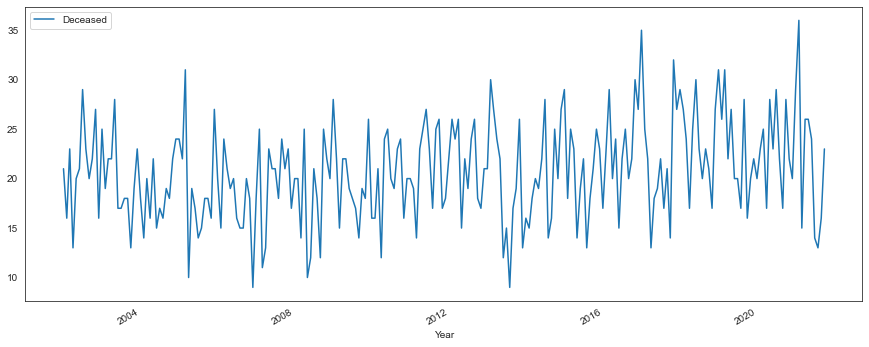

In [46]:
y.plot(figsize=(15,6))
plt.show()

In [47]:
# aaEnHunze["Deceased"] = aaEnHunze["Deceased"].astype(str).astype(int)


In [49]:

warnings.filterwarnings("ignore") # specify to ignore warning messages

arrayy = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            arrayy.append(results.aic)
            
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 4)12 - AIC:31952.62733975691
SARIMAX(0, 0, 0)x(0, 0, 1, 4)12 - AIC:28787.081683829976
SARIMAX(0, 0, 0)x(0, 1, 0, 4)12 - AIC:23709.44034119133
SARIMAX(0, 0, 0)x(0, 1, 1, 4)12 - AIC:21472.892807158903
SARIMAX(0, 0, 0)x(1, 0, 0, 4)12 - AIC:23626.57865624714
SARIMAX(0, 0, 0)x(1, 0, 1, 4)12 - AIC:21538.893513543677
SARIMAX(0, 0, 0)x(1, 1, 0, 4)12 - AIC:22762.01934071228
SARIMAX(0, 0, 0)x(1, 1, 1, 4)12 - AIC:21512.769354201257
SARIMAX(0, 0, 1)x(0, 0, 0, 4)12 - AIC:28799.733797575034
SARIMAX(0, 0, 1)x(0, 0, 1, 4)12 - AIC:26544.501768759634
SARIMAX(0, 0, 1)x(0, 1, 0, 4)12 - AIC:23624.3725488802
SARIMAX(0, 0, 1)x(0, 1, 1, 4)12 - AIC:21340.786839968678
SARIMAX(0, 0, 1)x(1, 0, 0, 4)12 - AIC:23516.917179483593
SARIMAX(0, 0, 1)x(1, 0, 1, 4)12 - AIC:21367.459288417554
SARIMAX(0, 0, 1)x(1, 1, 0, 4)12 - AIC:22638.422291934316
SARIMAX(0, 0, 1)x(1, 1, 1, 4)12 - AIC:21335.81874092111
SARIMAX(0, 1, 0)x(0, 0, 0, 4)12 - AIC:23297.483254333973
SARIMAX(0, 1, 0)x(0, 0, 1, 4)12 - AIC:

In [50]:
min(arrayy)

21280.58595014803

In [51]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1267      0.017      7.446      0.000       0.093       0.160
ma.L1         -1.0483      0.006   -168.882      0.000      -1.060      -1.036
ma.S.L12      -1.0000      7.422     -0.135      0.893     -15.547      13.547
sigma2        20.8622    154.848      0.135      0.893    -282.633     324.358


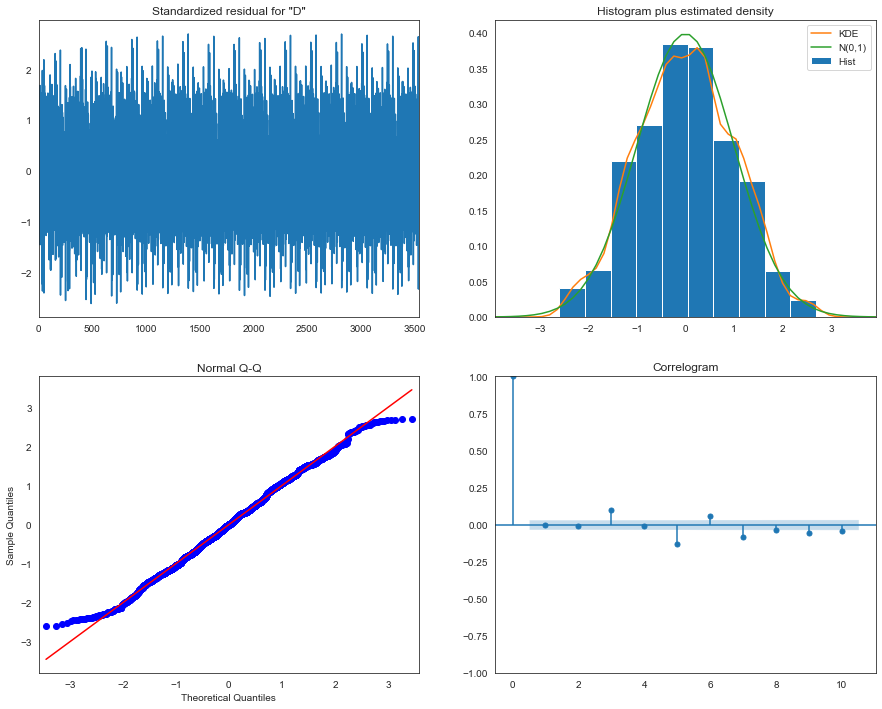

In [52]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2021-10-01') ,dynamic=False)
# pred = results.get_prediction(start=pd.to_datetime('2010-01-01') ,dynamic=False)

pred_ci = pred.conf_int()


# pred = results.get_prediction(start=pd.to_datetime('2003-01-01'),end=pd.to_datetime('2019-05-01') ,dynamic=False)
# pred_ci = pred.conf_int()

In [54]:
y.head(2)

Deceased
Year                
2002-01-01        21
2002-02-01        16

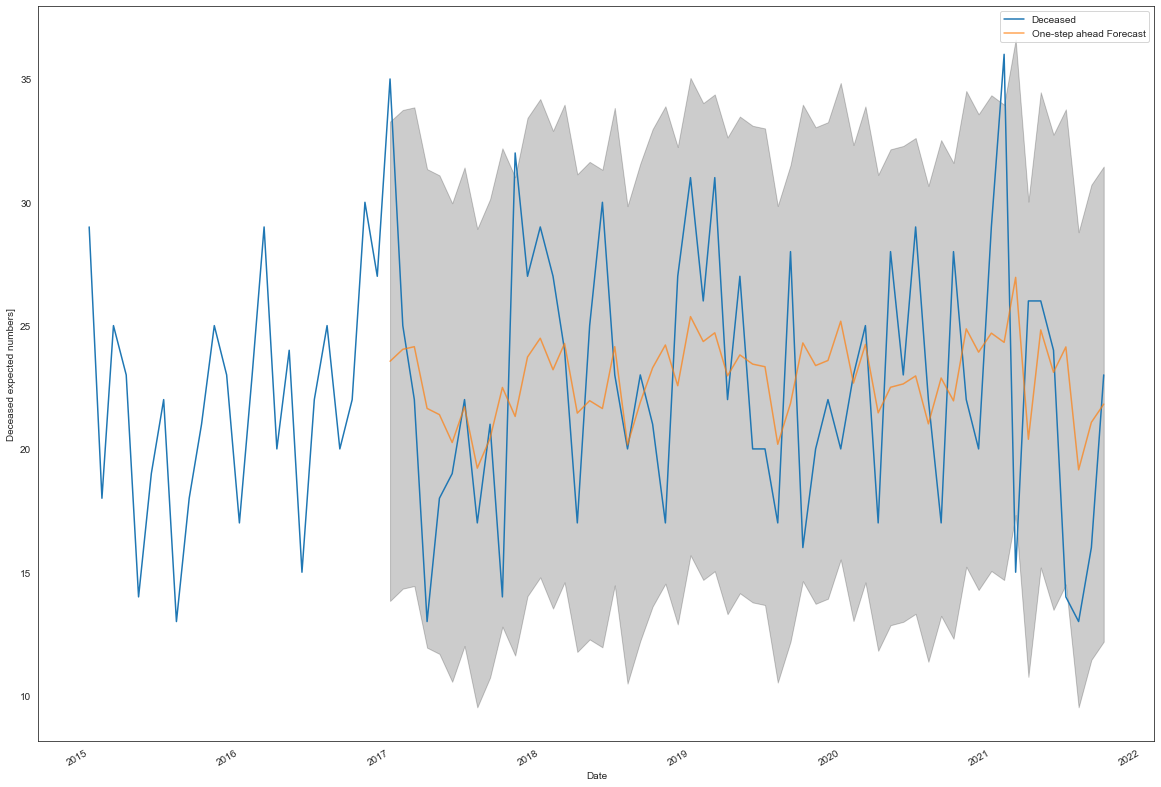

In [55]:

ax = y.loc['2015-01-01':].plot(label='observed', figsize=(20, 15))

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Deceased expected numbers]')
plt.legend()

plt.show()

In [56]:
y.Deceased

Year
2002-01-01    21
2002-02-01    16
2002-03-01    23
2002-04-01    13
2002-05-01    20
              ..
2021-06-01    24
2021-07-01    14
2021-08-01    13
2021-09-01    16
2021-10-01    23
Name: Deceased, Length: 3570, dtype: int32

In [57]:
y_forecasted = pred.predicted_mean
y_truth = y.Deceased.loc['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 27.38


In [58]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'),end=pd.to_datetime('2021-10-01') , dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

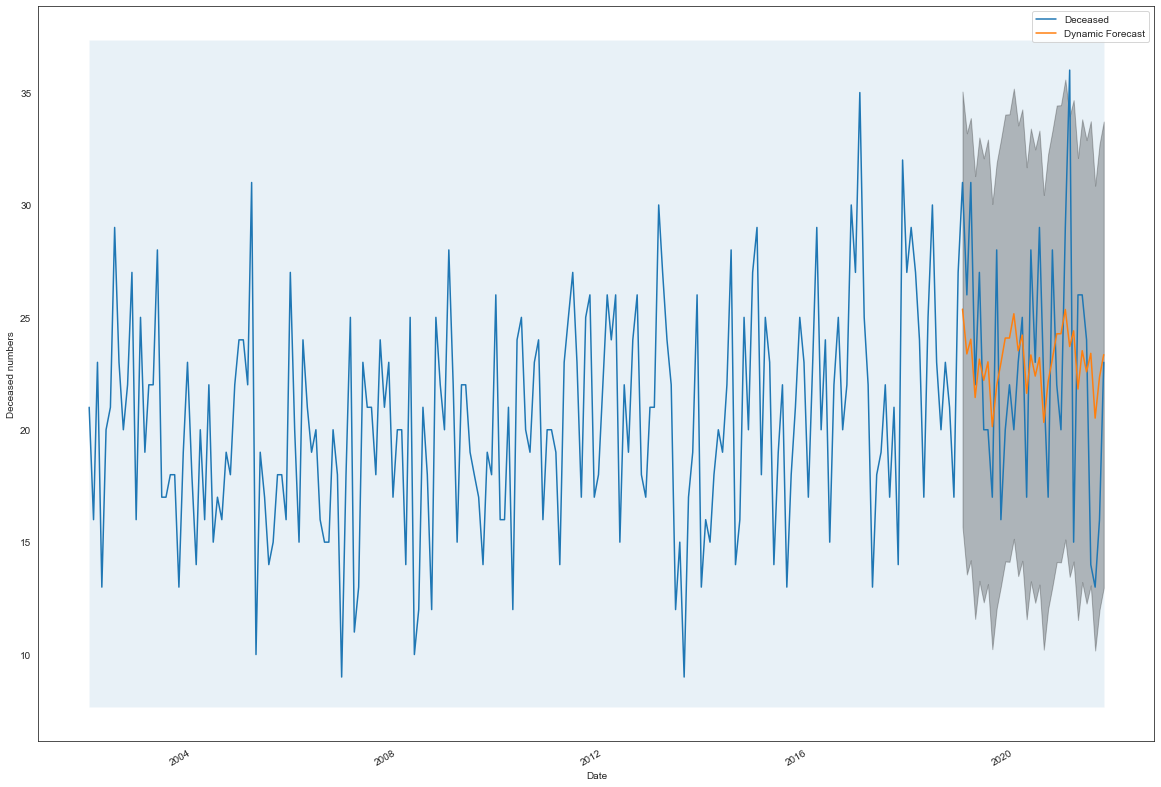

In [59]:
ax = y.loc['2002-01-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2002-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Deceased numbers')

plt.legend()
plt.show()

In [60]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y.Deceased.loc['2010-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25.79


In [71]:
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [62]:
pred_ci

lower Deceased  upper Deceased
3570       13.558427       32.358947
3571       12.206235       31.285176
3572       13.391166       32.512821
3573       12.442259       31.591518
3574       13.513177       32.688331
...              ...             ...
4065        7.159925       37.538473
4066        8.233783       38.632962
4067        7.045023       37.464819
4068        8.219908       38.660307
4069        6.935236       37.396462

[500 rows x 2 columns]

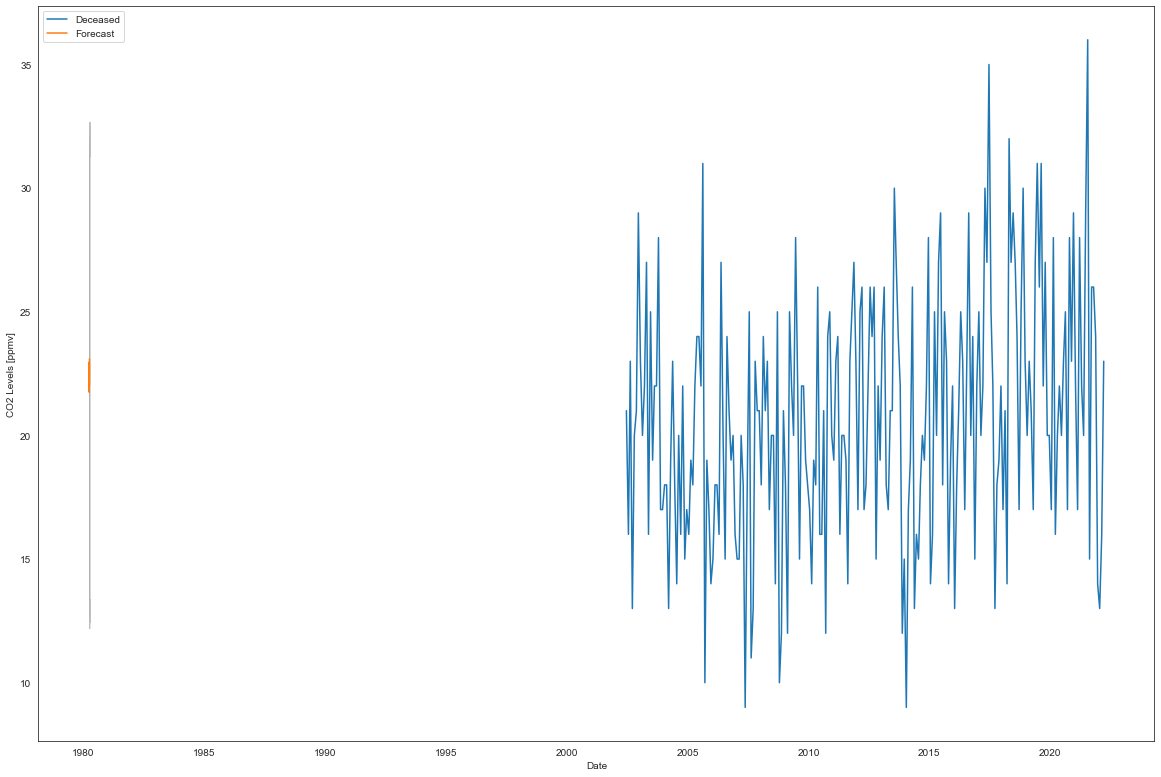

In [88]:
ax = y.plot(label='observed', figsize=(20, 15))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
pred_uc.predicted_mean.to_frame()


ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)



ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels [ppmv]')

plt.legend()
plt.show()


# ax = y.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# ax.fill_between(pred_ci.index,
#                 pred_ci.['lower Deceased'],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25,  interpolate= False)
# ax.set_xlabel('Date')
# ax.set_ylabel('Deceased numbers')

# plt.legend()
# plt.show()

In [85]:
print(pred_uc.predicted_mean)
pred_uc.predicted_mean.to_frame()

3570    22.958687
3571    21.745705
3572    22.951993
3573    22.016888
3574    23.100754
Name: predicted_mean, dtype: float64


predicted_mean
3570       22.958687
3571       21.745705
3572       22.951993
3573       22.016888
3574       23.100754